In [1]:
!pip install pycaret


In [2]:
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded["amazon_stock.csv"]))
data.head()

Saving amazon_stock.csv to amazon_stock.csv


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Gain,Loss,...,Usd_Rub_Close,Usd_Try_Close,IRX_Close,JPM_Close,BAC_Close,Citigroup_Close,WFC_Close,NASDAQ_Close,SP_500_Close,Dow_Jones_Close
0,2005-01-03,44.95,45.44,44.21,44.52,10446500,0,0.0,0.23,0.00,...,27.71,1.3440,2.204,26.45,34.03,440.71,19.30,2152.149902,1202.079956,10729.429688
1,2005-01-04,42.67,43.26,41.50,42.14,19418500,0,0.0,0.00,2.38,...,27.71,1.3510,2.292,26.18,33.56,436.96,19.31,2107.860107,1188.050049,10630.780273
2,2005-01-05,41.57,42.76,41.56,41.77,8354200,0,0.0,0.00,0.37,...,27.86,1.3740,2.282,26.24,33.17,442.44,19.33,2091.239990,1183.739990,10597.830078
3,2005-01-06,41.81,42.25,40.90,41.05,8700900,0,0.0,0.00,0.72,...,27.77,1.3925,2.267,26.39,33.12,446.73,19.40,2090.000000,1187.890015,10622.879883
4,2005-01-07,41.38,42.69,41.16,42.32,9836600,0,0.0,1.27,0.00,...,27.75,1.3940,2.277,26.17,32.76,444.17,19.38,2088.610107,1186.189941,10603.959961


In [3]:
from pycaret.regression import *
s = setup(data, target = 'Close', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Close
2,Target type,Regression
3,Original data shape,"(3552, 36)"
4,Transformed data shape,"(3552, 36)"
5,Transformed train set shape,"(2486, 36)"
6,Transformed test set shape,"(1066, 36)"
7,Numeric features,34
8,Categorical features,1
9,Preprocess,True


In [4]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,58.4899,6508.0080,79.5782,0.9769,0.4169,0.4140,1.4920
knn,K Neighbors Regressor,46.9297,9093.8756,94.7294,0.9663,0.1416,0.0991,0.0780
omp,Orthogonal Matching Pursuit,145.8514,33583.7483,183.0326,0.8771,0.8281,0.9980,0.0710
llar,Lasso Least Angle Regression,186.8095,59385.6591,243.0928,0.7846,0.8968,1.4003,0.0990
rf,Random Forest Regressor,223.8373,77116.0810,276.1555,0.7227,1.0830,2.0339,4.2970
ada,AdaBoost Regressor,220.2961,81671.9801,282.6643,0.7062,1.0943,2.0721,0.7750
lightgbm,Light Gradient Boosting Machine,255.3870,116282.1325,337.0281,0.5850,1.1148,2.1228,2.0870
huber,Huber Regressor,238.0796,166076.0370,372.7310,0.3865,1.0349,1.2800,0.0900
gbr,Gradient Boosting Regressor,329.4769,182318.1582,425.4292,0.3406,1.2581,2.6842,2.1300
en,Elastic Net,358.4466,218091.0973,466.2772,0.2075,1.2788,2.6896,0.1570


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [5]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [6]:
pred_holdout = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,55.1914,5230.1218,72.3196,0.9815,0.3831,0.3721


In [7]:
new_data = data.copy().drop('Close', axis = 1)
predictions = predict_model(best, data = new_data)

In [8]:
predictions

,Date,Open,High,Low,Volume,Dividends,Stock Splits,Gain,Loss,Avg_Gain,...,Usd_Try_Close,IRX_Close,JPM_Close,BAC_Close,Citigroup_Close,WFC_Close,NASDAQ_Close,SP_500_Close,Dow_Jones_Close,prediction_label
0,2005-01-03,44.950001,45.439999,44.209999,10446500,0,0.0,0.230000,0.000000,0.572143,...,1.3440,2.204,26.450001,34.029999,440.709991,19.299999,2152.149902,1202.079956,10729.429688,44.520000
1,2005-01-04,42.669998,43.259998,41.500000,19418500,0,0.0,0.000000,2.380000,0.528571,...,1.3510,2.292,26.180000,33.560001,436.959991,19.309999,2107.860107,1188.050049,10630.780273,42.139999
2,2005-01-05,41.570000,42.759998,41.560001,8354200,0,0.0,0.000000,0.370000,0.488571,...,1.3740,2.282,26.240000,33.169998,442.440002,19.330000,2091.239990,1183.739990,10597.830078,41.770000
3,2005-01-06,41.810001,42.250000,40.900002,8700900,0,0.0,0.000000,0.720000,0.488571,...,1.3925,2.267,26.389999,33.119999,446.730011,19.400000,2090.000000,1187.890015,10622.879883,41.049999
4,2005-01-07,41.380001,42.689999,41.160000,9836600,0,0.0,1.270000,0.000000,0.579286,...,1.3940,2.277,26.170000,32.759998,444.170013,19.379999,2088.610107,1186.189941,10603.959961,92.020100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,2019-08-16,1792.890015,1802.910034,1784.550049,3018000,0,0.0,16.450001,0.000000,9.770715,...,5.5691,1.823,107.720001,27.030001,63.480000,44.389999,7895.990234,2888.679932,25886.009766,1792.569946
3548,2019-08-19,1818.079956,1826.000000,1812.609985,2816300,0,0.0,23.549999,0.000000,11.452857,...,5.5862,1.853,108.690002,27.270000,64.309998,45.250000,8002.810059,2923.649902,26135.789062,1816.119995
3549,2019-08-20,1814.500000,1816.819946,1799.880005,1929500,0,0.0,0.000000,14.740000,11.452857,...,5.6491,1.900,107.309998,26.719999,63.419998,44.680000,7948.560059,2900.510010,25962.439453,1801.380005
3550,2019-08-21,1819.390015,1829.579956,1815.000000,2031800,0,0.0,22.160000,0.000000,13.035714,...,5.7319,1.928,107.610001,26.930000,63.250000,45.000000,8020.209961,2924.429932,26202.730469,1823.540039


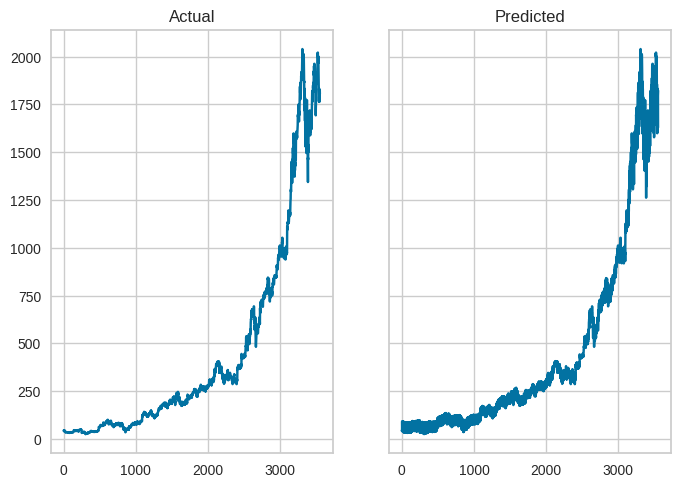

In [15]:
# prompt: I want to side by side plot a graph with 'Close' in data and the prediction in the new_data and see how similar they are. Let prediction be ahead in the x axis, so we can see it both line graphs side by side

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].plot(data['Close'])
ax[0].set_title('Actual')
ax[1].plot(predictions['prediction_label'])
ax[1].set_title('Predicted')
plt.show()
